# Linear Regression

In [1]:
# import libraries
import os
import sys
import tqdm
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
import matplotlib.pyplot as plt

print(f'tqdm version is  :{tqdm.__version__}')
print(f'torch version is  :{torch.__version__}')
print(f'numpy version is : {np.__version__}')
print(f'pandas version is : {pd.__version__}')

numpy version is : 1.21.5
pandas version is : 1.4.2


x shape is : (15, 1), y shape is : (15, 1)


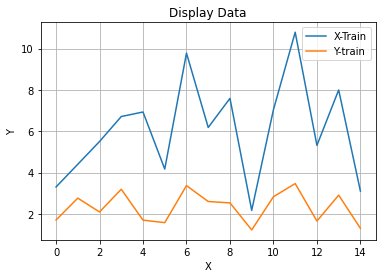

In [25]:
# Define dataset 
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
                    [9.779], [6.182], [7.59], [2.167], [7.042], 
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
                    [3.366], [2.596], [2.53], [1.221], [2.827], 
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)
print(f'x shape is : {x_train.shape}, y shape is : {y_train.shape}')
# Let's plot the data 
plt.plot(x_train)
plt.plot(y_train)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(['X-Train', 'Y-train'])
plt.title('Display Data')
plt.grid()
plt.show()

In [9]:
# Let's define the linear model 
input_size = 1
output_size = 1
epochs = 60     
learning_rate = 0.01
model = nn.Linear(in_features=input_size, 
                  out_features=output_size)
# We need a loss function and optimizer
loss = nn.MSELoss()
optimzer = torch.optim.SGD(model.parameters(), lr=learning_rate)
print(f'model summary is : {model}')

model summary is : Linear(in_features=1, out_features=1, bias=True)


In [29]:
# Let's define the training loop
for epoch in tqdm.tqdm(range(epochs)):
    # print(f'epoch is : {epoch}')
    inputs = torch.from_numpy(x_train)
    targets = torch.from_numpy(y_train)

    # Let's define the forward pass
    outputs = model(inputs)
    l = loss(outputs, targets)
    
    # Now let's define the backpropagation and optimization 
    optimzer.zero_grad()
    l.backward()
    optimzer.step()
    print(f'loss is : {l.item()}')
    

100%|██████████| 60/60 [00:00<00:00, 1396.19it/s]

loss is : 0.1728709638118744
loss is : 0.17285065352916718
loss is : 0.17283043265342712
loss is : 0.1728103756904602
loss is : 0.17279043793678284
loss is : 0.17277051508426666
loss is : 0.17275077104568481
loss is : 0.17273108661174774
loss is : 0.17271150648593903
loss is : 0.17269203066825867
loss is : 0.17267268896102905
loss is : 0.17265339195728302
loss is : 0.17263419926166534
loss is : 0.1726151406764984
loss is : 0.17259615659713745
loss is : 0.17257723212242126
loss is : 0.1725585162639618
loss is : 0.17253978550434113
loss is : 0.1725212186574936
loss is : 0.17250271141529083
loss is : 0.17248430848121643
loss is : 0.1724659651517868
loss is : 0.17244775593280792
loss is : 0.1724296659231186
loss is : 0.17241165041923523
loss is : 0.17239370942115784
loss is : 0.1723758727312088
loss is : 0.17235809564590454
loss is : 0.17234043776988983
loss is : 0.1723228394985199
loss is : 0.1723053902387619
loss is : 0.1722879707813263
loss is : 0.17227071523666382
loss is : 0.172253459

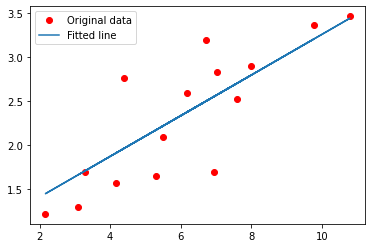

In [26]:
# Plot the graph
# When we are making predictions, we need to detach gradient from the model 
predicted = model(torch.from_numpy(x_train)).detach().numpy()
plt.plot(x_train, y_train, 'ro', label='Original data')
plt.plot(x_train, predicted, label='Fitted line')
plt.legend()
plt.show()

In [27]:
m = nn.Linear(20, 30)
input = torch.randn(128, 20)
output = m(input) # This will predict against the input 
print(output.size())

torch.Size([128, 30])


In [31]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

weight tensor([[0.2386]])
bias tensor([0.8966])
